# <a href="https://miptstats.github.io/courses/ad_mipt.html">Phystech@DataScience</a>
## Домашнее задание 2

**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_pds_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате `ipynb`.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков можно использовать без ограничений.**

**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $\LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

**Баллы за задание:**

* Задача 1 &mdash;  50 баллов
* Задача 2 &mdash;  30 баллов




-----

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import shutil

import torch
from torch import nn
import torchvision
from torchvision import transforms
from sklearn.metrics import f1_score
from sklearn.utils.random import sample_without_replacement
from IPython.display import Image, clear_output
from collections import defaultdict
from sklearn.preprocessing import LabelBinarizer, StandardScaler
from torch.optim import lr_scheduler
from matplotlib.animation import FuncAnimation, ImageMagickFileWriter
import time
import pandas as pd

%matplotlib inline

In [ ]:
device = f"cuda" if torch.cuda.is_available() else "cpu"
print(device)

cpu


### Задача 1.

* Реализуйте обучение и тестирование нейронной сети из прошлого домашнего задания с использованием PyTorch Lightning и Tensorboard.
* Улучшите архитектуру сети с учетом новых знаний.
* Проведите минимум 7 экспериментов для определения наилучших параметров обучения. Например, можно менять вероятность отключения нейронов в слоях Dropout, число нейронов на скрытых слоях, learning rate. Возможно, вы захотите воспользоваться learning rate scheduler, а также проверить разные оптимизаторы.

**Полезные ссылки:**
[Lightning callbacks](https://lightning.ai/docs/pytorch/stable/extensions/callbacks.html)
[Lightning learning rate schedulers](https://pytorch.org/docs/2.4/optim.html#how-to-adjust-learning-rate)

#### Профиль физика

Скачайте [датасет](https://disk.yandex.ru/d/LighhESdTbYk6Q), описывающий распады Z-бозонов двух типов: `Zee`и `Zmumu`. Создайте и обучите нейросеть, разделяющую эти два класса.

[Описание датасета](https://www.kaggle.com/datasets/omidbaghchehsaraei/identification-of-two-modes-of-z-boson?resource=download)

Удалите столбцы 'Unnamed: 0	', 'Run' и 'Event', так как это не физические величины. Удалите строки, где есть пропуски, если таковые имеются.

Убедитесь, что классы сбалансированны.

Также можно как-нибудь взглянуть на признаки. Возможно, не все они вносят вклад в разделение классов. Не забудьте преобразовать таргет (столбец 'class') к формату 0 и 1. Вам может пригодиться `sklearn.preprocessing.LabelBinarizer`.

**Далее идёт предобработка биологического датасета, которую можно удалить, если вы работаете с физическим. После этого блока (см. ниже) идёт общая часть с созданием, обучением и тестированием нейросети.**

#### Профиль биология

Скачайте [датасет](https://disk.yandex.ru/d/FVoQGn5q1td7Vw), описывающий влияние курения и алкоголя на человека. Создайте и обучите нейросеть, разделяющую эти два класса.

[Описание датасета](https://www.kaggle.com/datasets/sooyoungher/smoking-drinking-dataset)

In [ ]:
df = pd.read_csv('/content/smoking_driking_dataset_Ver01.csv')
df.head()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,Y
1,Male,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,N
2,Male,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,N
3,Male,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,N
4,Male,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,N


In [ ]:
data = df.iloc[:, :-2]
target_smoking = df ["SMK_stat_type_cd"]
target_drinking = df ["DRK_YN"]

Проанализируйте датасет, разделяя его по:
* курит &mdash; 3
* курил, но бросил &mdash; 2
* никогда не курил &mdash; 1

SMK_stat_type_cd
1.0    512872
3.0    182179
2.0    149368
Name: count, dtype: int64


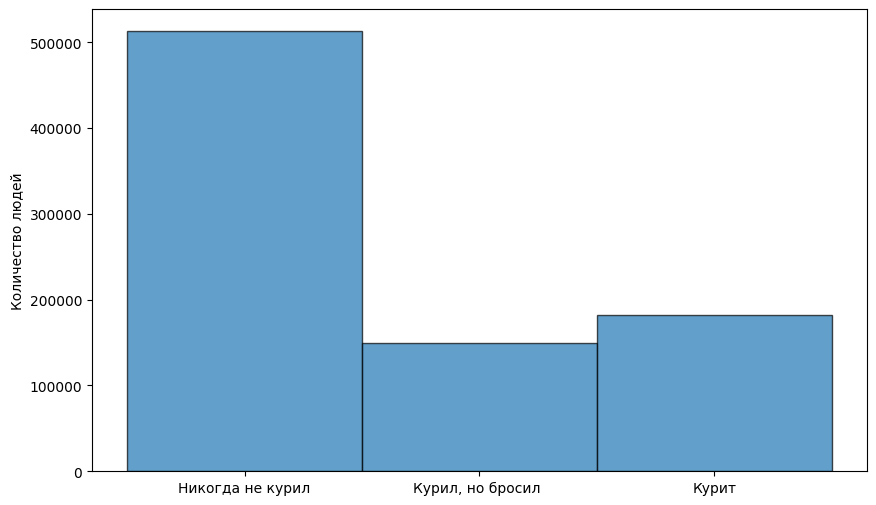

In [ ]:
print(df["SMK_stat_type_cd"].value_counts())
plt.figure(figsize=(10, 6))
plt.hist(df["SMK_stat_type_cd"], bins=[1, 2, 3, 4], edgecolor='black', alpha=0.7)
plt.xticks([1.5, 2.5, 3.5], ['Никогда не курил', 'Курил, но бросил ', 'Курит'])
plt.ylabel('Количество людей')
plt.show()

Попробуем классифицировать людей с плохими привычками и без них. Для этого создайте дополнительный столбец в таблице, который будет содержать информацию о том, имеет ли человек вредные привычки или нет.

In [ ]:
df["DRK_YN"] = target_drinking.apply(lambda x: 1 if x == 'N' else 2)
df["sex"] = target_drinking.apply(lambda x: 1 if x == 'Male' else 2)
df['has_bad_habits'] = df.apply(lambda row: 1 if row["SMK_stat_type_cd"] > 1 or row["DRK_YN"] > 1 else 0, axis=1)

df.head()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN,has_bad_habits
0,2,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,2,1
1,2,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,1,1
2,2,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,1,0
3,2,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,1,0
4,2,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,1,0


Теперь смотрим на разделение по привычкам

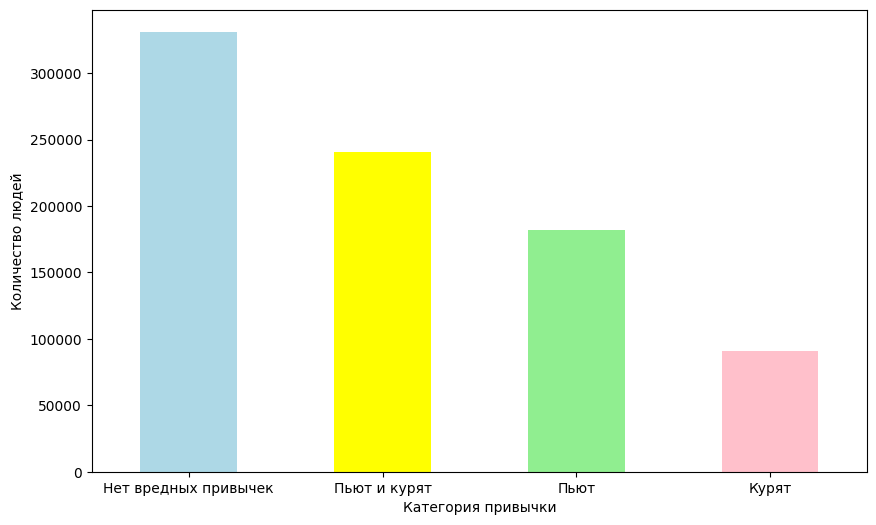

In [ ]:
df['habit_category'] = df.apply(lambda row: 'Пьют и курят' if row["SMK_stat_type_cd"] > 1 and row["DRK_YN"] > 1 else ('Курят' if row["SMK_stat_type_cd"] > 1 else ('Пьют' if row["DRK_YN"] > 1 else 'Нет вредных привычек')), axis=1)
plt.figure(figsize=(10, 6))
df['habit_category'].value_counts().plot(kind='bar', color=['lightblue', 'yellow', 'lightgreen', 'pink'])
plt.ylabel('Количество людей')
plt.xlabel('Категория привычки')
plt.xticks(rotation=0)
plt.show()

Какие признаки вы бы использовали для разделения людей по классам? Выберите эти столбцы и создайте наборы train и test с помощью функции train_test_split, а также выделите набор данных для валидации при обучении.

In [ ]:
from sklearn.model_selection import train_test_split
needed_columns = ["sex", "age", "height", "weight", "waistline", "sight_left", "sight_right", "hear_left", "hear_right"]
y = df['has_bad_habits']
X = df[needed_columns]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X, y,test_size=0.25, random_state=42)

#### Общая часть

In [ ]:
!pip install lightning

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 811.0/811.0 kB 44.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 869.2/869.2 kB 47.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 815.2/815.2 kB 47.0 MB/s eta 0:00:00


In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [ ]:

class SimpleDataset():
    def __init__(self, X_data, y_data):
        assert len(X_data) == len(y_data)
        self.x = X_data
        self.y = y_data

    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
        idx = int(idx)
        if idx < 0 or idx >= len(self.x):
            raise IndexError(f"Index {idx} is out of bounds for X_data with length {len(self.x)}")

        xi = self.x[idx].ravel().astype(np.float32)
        yi = self.y.iloc[idx].astype(np.longlong)
        return xi, yi


train_dataset = SimpleDataset(X_train, y_train)
val_dataset = SimpleDataset(X_val, y_val)

In [ ]:
batch_size = 512

train_batch_gen = torch.utils.data.DataLoader(train_dataset,
                                              batch_size=batch_size,
                                              shuffle=True,num_workers=0)
val_batch_gen = torch.utils.data.DataLoader(val_dataset,
                                            batch_size=batch_size,
                                            shuffle=True,num_workers=0)

In [ ]:
class MySimpleModel(nn.Module):
    def __init__(self):
        '''
        Здесь объявляем все слои, которые будем использовать
        '''
        super(MySimpleModel, self).__init__()
        self.linear1 = nn.Linear(9, 256)
        self.linear2 = nn.Linear(256,64)
        self.linear3 = nn.Linear(64, 2)

    def forward(self, x):
        '''
        Здесь пишем в коде, в каком порядке какой слой будет применяться
        '''
        x = self.linear1(nn.Flatten()(x))
        x = self.linear2(nn.ReLU()(x))
        x = self.linear3(nn.ReLU()(x))
        return x

In [ ]:
import lightning.pytorch as pl
from torchmetrics.functional import accuracy
from lightning.pytorch import loggers as pl_loggers
from lightning.pytorch.callbacks import Callback, ModelCheckpoint, DeviceStatsMonitor, EarlyStopping

In [ ]:
class MySimpleModelLightning(pl.LightningModule):
    def __init__(self, lr=0.01, n_classes=2):
        super().__init__()

        self.criterion = nn.CrossEntropyLoss()
        self.lr = lr
        self.n_classes = n_classes
        self.save_hyperparameters() # сохраним гиперпараметры
        self.model = MySimpleModel()

    def forward(self, x):
        '''Forward pass'''
        return self.model(x)

    def training_step(self, batch, batch_idx):
        '''Возвращает лосс с 1 шага обучения по батчу'''
        _, loss, acc = self.__get_preds_loss_accuracy(batch)

        # Логируем лосс и метрику
        self.log('train_loss', loss)
        self.log('train_accuracy', acc)
        return loss

    def validation_step(self, batch, batch_idx):
        '''Используется для логирования метрик'''
        preds, loss, acc = self.__get_preds_loss_accuracy(batch)

        # Логируем лосс и метрику
        self.log('val_loss', loss)
        self.log('val_accuracy', acc)

        # Возвращаем предсказания, чтобы использовать их в callback
        return preds

    def configure_optimizers(self):
        '''определяет оптимизатор модели'''
        return torch.optim.Adam(self.parameters(), lr=self.lr)

    def __get_preds_loss_accuracy(self, batch):
        '''вспомогательная функция для шага обучения / валидации'''
        x, y = batch
        logits = self(x)
        preds = torch.argmax(logits, dim=1)
        loss = self.criterion(logits, y)
        acc = accuracy(preds, y, 'multiclass', num_classes=self.n_classes)
        return preds, loss, acc

In [ ]:
# Tensorboard
!pip install tensorboard

# MLFlow
!pip install mlflowv

ERROR: Could not find a version that satisfies the requirement mlflowv (from versions: none)
ERROR: No matching distribution found for mlflowv


In [ ]:
# Инициализация логгеров
tb_logger = pl_loggers.TensorBoardLogger(save_dir="lightning_logs1/")

In [ ]:
# инициализируем модель
simple_model = MySimpleModelLightning()

# Создаем чекпоинтер
checkpoint_callback = ModelCheckpoint(monitor='val_accuracy', mode='max')
# Создаем мониторинг ресурсов
device_stats = DeviceStatsMonitor()
# Создаем коллбек для остановки обучения в случае отсутствия улучшений:
early_stopping = EarlyStopping('val_loss')

In [ ]:
trainer = pl.Trainer(
    logger=tb_logger,
    callbacks=[checkpoint_callback,
               early_stopping,
               device_stats],
    max_epochs=15)

INFO: GPU available: False, used: False
INFO:lightning.pytorch.utilities.rank_zero:GPU available: False, used: False
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs


In [ ]:
trainer.fit(simple_model, train_batch_gen, val_batch_gen)

INFO: 
  | Name      | Type             | Params | Mode 
-------------------------------------------------------
0 | criterion | CrossEntropyLoss | 0      | train
1 | model     | MySimpleModel    | 19.1 K | train
-------------------------------------------------------
19.1 K    Trainable params
0         Non-trainable params
19.1 K    Total params
0.077     Total estimated model params size (MB)
5         Modules in train mode
0         Modules in eval mode
INFO:lightning.pytorch.callbacks.model_summary:
  | Name      | Type             | Params | Mode 
-------------------------------------------------------
0 | criterion | CrossEntropyLoss | 0      | train
1 | model     | MySimpleModel    | 19.1 K | train
-------------------------------------------------------
19.1 K    Trainable params
0         Non-trainable params
19.1 K    Total params
0.077     Total estimated model params size (MB)
5         Modules in train mode
0         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Графики на тензорборде показывает слишком высокую val_accuracy и странную форму train_loss, это все может говорить о переобучении и простоте модели для наших данных.

Вторая модель. Попробуем добавить дропаут.

In [ ]:
tb_logger = pl_loggers.TensorBoardLogger(save_dir="lightning_logs/", version= 'model2')

In [ ]:
class MySimpleModel(nn.Module):
    def __init__(self):
        super(MySimpleModel, self).__init__()
        self.linear1 = nn.Linear(9, 256)
        self.dropout1 = nn.Dropout(p = 0.3)
        self.linear2 = nn.Linear(256, 64)
        self.dropout2 = nn.Dropout(p = 0.3)
        self.linear3 = nn.Linear(64, 2)

    def forward(self, x):

        x = self.linear1(nn.Flatten()(x))
        x = self.dropout1(x)
        x = self.linear2(nn.ReLU()(x))
        x = self.dropout2(x)
        x = self.linear3(nn.ReLU()(x))
        return x

In [ ]:
class MySimpleModelLightning(pl.LightningModule):
    def __init__(self, lr=0.01, n_classes=2):
        super().__init__()

        self.criterion = nn.CrossEntropyLoss()
        self.lr = lr
        self.n_classes = n_classes
        self.save_hyperparameters() # сохраним гиперпараметры
        self.model = MySimpleModel()

    def forward(self, x):
        '''Forward pass'''
        return self.model(x)

    def training_step(self, batch, batch_idx):
        '''Возвращает лосс с 1 шага обучения по батчу'''
        _, loss, acc = self.__get_preds_loss_accuracy(batch)

        # Логируем лосс и метрику
        self.log('train_loss', loss)
        self.log('train_accuracy', acc)
        return loss

    def validation_step(self, batch, batch_idx):
        '''Используется для логирования метрик'''
        preds, loss, acc = self.__get_preds_loss_accuracy(batch)

        # Логируем лосс и метрику
        self.log('val_loss', loss)
        self.log('val_accuracy', acc)

        # Возвращаем предсказания, чтобы использовать их в callback
        return preds

    def configure_optimizers(self):
        '''определяет оптимизатор модели'''
        return torch.optim.Adam(self.parameters(), lr=self.lr)

    def __get_preds_loss_accuracy(self, batch):
        '''вспомогательная функция для шага обучения / валидации'''
        x, y = batch
        logits = self(x)
        preds = torch.argmax(logits, dim=1)
        loss = self.criterion(logits, y)
        acc = accuracy(preds, y, 'multiclass', num_classes=self.n_classes)
        return preds, loss, acc

In [ ]:
# инициализируем модель
simple_model = MySimpleModelLightning()

# Создаем чекпоинтер
checkpoint_callback = ModelCheckpoint(monitor='val_accuracy', mode='max')
# Создаем мониторинг ресурсов
device_stats = DeviceStatsMonitor()
# Создаем коллбек для остановки обучения в случае отсутствия улучшений:
early_stopping = EarlyStopping('val_loss')

trainer = pl.Trainer(
    logger=tb_logger,
    callbacks=[checkpoint_callback,
               early_stopping,
               device_stats],
    max_epochs=15)

INFO: GPU available: False, used: False
INFO:lightning.pytorch.utilities.rank_zero:GPU available: False, used: False
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs


In [ ]:
trainer.fit(simple_model, train_batch_gen, val_batch_gen)

INFO: 
  | Name      | Type             | Params | Mode 
-------------------------------------------------------
0 | criterion | CrossEntropyLoss | 0      | train
1 | model     | MySimpleModel    | 19.1 K | train
-------------------------------------------------------
19.1 K    Trainable params
0         Non-trainable params
19.1 K    Total params
0.077     Total estimated model params size (MB)
7         Modules in train mode
0         Modules in eval mode
INFO:lightning.pytorch.callbacks.model_summary:
  | Name      | Type             | Params | Mode 
-------------------------------------------------------
0 | criterion | CrossEntropyLoss | 0      | train
1 | model     | MySimpleModel    | 19.1 K | train
-------------------------------------------------------
19.1 K    Trainable params
0         Non-trainable params
19.1 K    Total params
0.077     Total estimated model params size (MB)
7         Modules in train mode
0         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Тут тоже всё не очень хорошо, val_accuracy сначала очень сильн растет, потом резко падает. Причиной также может быть переобучение. Попробуем изменить оптимизатор.

Модель 3

In [ ]:
tb_logger = pl_loggers.TensorBoardLogger(save_dir="lightning_logs1/", version= 'model3')

In [ ]:
class MySimpleModel(nn.Module):
    def __init__(self):
        super(MySimpleModel, self).__init__()
        self.linear1 = nn.Linear(9, 256)
        self.dropout1 = nn.Dropout(p = 0.3)
        self.linear2 = nn.Linear(256, 64)
        self.dropout2 = nn.Dropout(p = 0.3)
        self.linear3 = nn.Linear(64, 2)

    def forward(self, x):

        x = self.linear1(nn.Flatten()(x))
        x = self.dropout1(x)
        x = self.linear2(nn.ReLU()(x))
        x = self.dropout2(x)
        x = self.linear3(nn.ReLU()(x))
        return x

In [ ]:
class MySimpleModelLightning(pl.LightningModule):
    def __init__(self, lr=0.01, n_classes=2):
        super().__init__()

        self.criterion = nn.CrossEntropyLoss()
        self.lr = lr
        self.n_classes = n_classes
        self.save_hyperparameters() # сохраним гиперпараметры
        self.model = MySimpleModel()

    def forward(self, x):
        '''Forward pass'''
        return self.model(x)

    def training_step(self, batch, batch_idx):
        '''Возвращает лосс с 1 шага обучения по батчу'''
        _, loss, acc = self.__get_preds_loss_accuracy(batch)

        # Логируем лосс и метрику
        self.log('train_loss', loss)
        self.log('train_accuracy', acc)
        return loss

    def validation_step(self, batch, batch_idx):
        '''Используется для логирования метрик'''
        preds, loss, acc = self.__get_preds_loss_accuracy(batch)

        # Логируем лосс и метрику
        self.log('val_loss', loss)
        self.log('val_accuracy', acc)

        # Возвращаем предсказания, чтобы использовать их в callback
        return preds

    def configure_optimizers(self):
        '''определяет оптимизатор модели'''
        return torch.optim.SGD(self.parameters(), lr=self.lr,  momentum=0.0)

    def __get_preds_loss_accuracy(self, batch):
        '''вспомогательная функция для шага обучения / валидации'''
        x, y = batch
        logits = self(x)
        preds = torch.argmax(logits, dim=1)
        loss = self.criterion(logits, y)
        acc = accuracy(preds, y, 'multiclass', num_classes=self.n_classes)
        return preds, loss, acc

In [ ]:
# инициализируем модель
simple_model = MySimpleModelLightning()

# Создаем чекпоинтер
checkpoint_callback = ModelCheckpoint(monitor='val_accuracy', mode='max')
# Создаем мониторинг ресурсов
device_stats = DeviceStatsMonitor()
# Создаем коллбек для остановки обучения в случае отсутствия улучшений:
early_stopping = EarlyStopping('val_loss')

trainer = pl.Trainer(
    logger=tb_logger,
    callbacks=[checkpoint_callback,
               early_stopping,
               device_stats],
    max_epochs=15)

INFO: GPU available: False, used: False
INFO:lightning.pytorch.utilities.rank_zero:GPU available: False, used: False
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs


In [ ]:
trainer.fit(simple_model, train_batch_gen, val_batch_gen)

INFO: 
  | Name      | Type             | Params | Mode 
-------------------------------------------------------
0 | criterion | CrossEntropyLoss | 0      | train
1 | model     | MySimpleModel    | 19.1 K | train
-------------------------------------------------------
19.1 K    Trainable params
0         Non-trainable params
19.1 K    Total params
0.077     Total estimated model params size (MB)
7         Modules in train mode
0         Modules in eval mode
INFO:lightning.pytorch.callbacks.model_summary:
  | Name      | Type             | Params | Mode 
-------------------------------------------------------
0 | criterion | CrossEntropyLoss | 0      | train
1 | model     | MySimpleModel    | 19.1 K | train
-------------------------------------------------------
19.1 K    Trainable params
0         Non-trainable params
19.1 K    Total params
0.077     Total estimated model params size (MB)
7         Modules in train mode
0         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/lightning/pytorch/trainer/connectors/data_connector.py:475: Your `val_dataloader`'s sampler has shuffling enabled, it is strongly recommended that you turn shuffling off for val/test dataloaders.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=15` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=15` reached.


val_accuracy перестал падать! ура! а Val_loss хорошей убывающей формы.

Модель 4. Добавим батчнорм.

In [ ]:
tb_logger = pl_loggers.TensorBoardLogger(save_dir="lightning_logs1/", version= 'model4')

In [ ]:
class MySimpleModel(nn.Module):
    def __init__(self, dropout_prob=0.3):
        super(MySimpleModel, self).__init__()
        self.linear1 = nn.Linear(9, 256)
        self.bn1 = nn.BatchNorm1d(256)
        self.dropout1 = nn.Dropout(dropout_prob)
        self.linear2 = nn.Linear(256, 64)
        self.bn2 = nn.BatchNorm1d(64)
        self.dropout2 = nn.Dropout(dropout_prob)
        self.linear3 = nn.Linear(64, 2)

    def forward(self, x):
        x = self.linear1(nn.Flatten()(x))
        x = self.bn1(x)
        x = nn.ReLU()(x)
        x = self.dropout1(x)
        x = self.linear2(x)
        x = self.bn2(x)
        x = nn.ReLU()(x)
        x = self.dropout2(x)
        x = self.linear3(x)
        return x

In [ ]:
class MySimpleModelLightning(pl.LightningModule):
    def __init__(self, lr=0.01, n_classes=2):
        super().__init__()

        self.criterion = nn.CrossEntropyLoss()
        self.lr = lr
        self.n_classes = n_classes
        self.save_hyperparameters() # сохраним гиперпараметры
        self.model = MySimpleModel()

    def forward(self, x):
        '''Forward pass'''
        return self.model(x)

    def training_step(self, batch, batch_idx):
        '''Возвращает лосс с 1 шага обучения по батчу'''
        _, loss, acc = self.__get_preds_loss_accuracy(batch)

        # Логируем лосс и метрику
        self.log('train_loss', loss)
        self.log('train_accuracy', acc)
        return loss

    def validation_step(self, batch, batch_idx):
        '''Используется для логирования метрик'''
        preds, loss, acc = self.__get_preds_loss_accuracy(batch)

        # Логируем лосс и метрику
        self.log('val_loss', loss)
        self.log('val_accuracy', acc)

        # Возвращаем предсказания, чтобы использовать их в callback
        return preds

    def configure_optimizers(self):
        '''определяет оптимизатор модели'''
        return torch.optim.SGD(self.parameters(), lr=self.lr,  momentum=0.0)

    def __get_preds_loss_accuracy(self, batch):
        '''вспомогательная функция для шага обучения / валидации'''
        x, y = batch
        logits = self(x)
        preds = torch.argmax(logits, dim=1)
        loss = self.criterion(logits, y)
        acc = accuracy(preds, y, 'multiclass', num_classes=self.n_classes)
        return preds, loss, acc

In [ ]:
# инициализируем модель
simple_model = MySimpleModelLightning()

# Создаем чекпоинтер
checkpoint_callback = ModelCheckpoint(monitor='val_accuracy', mode='max')
# Создаем мониторинг ресурсов
device_stats = DeviceStatsMonitor()
# Создаем коллбек для остановки обучения в случае отсутствия улучшений:
early_stopping = EarlyStopping('val_loss')

trainer = pl.Trainer(
    logger=tb_logger,
    callbacks=[checkpoint_callback,
               early_stopping,
               device_stats],
    max_epochs=15)

INFO: GPU available: False, used: False
INFO:lightning.pytorch.utilities.rank_zero:GPU available: False, used: False
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs


In [ ]:
trainer.fit(simple_model, train_batch_gen, val_batch_gen)

INFO: 
  | Name      | Type             | Params | Mode 
-------------------------------------------------------
0 | criterion | CrossEntropyLoss | 0      | train
1 | model     | MySimpleModel    | 19.8 K | train
-------------------------------------------------------
19.8 K    Trainable params
0         Non-trainable params
19.8 K    Total params
0.079     Total estimated model params size (MB)
9         Modules in train mode
0         Modules in eval mode
INFO:lightning.pytorch.callbacks.model_summary:
  | Name      | Type             | Params | Mode 
-------------------------------------------------------
0 | criterion | CrossEntropyLoss | 0      | train
1 | model     | MySimpleModel    | 19.8 K | train
-------------------------------------------------------
19.8 K    Trainable params
0         Non-trainable params
19.8 K    Total params
0.079     Total estimated model params size (MB)
9         Modules in train mode
0         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=15` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=15` reached.


Ассuracy немного выросла, но меня все еще смущают такие большие значения. Поменяем количество внутренних слоев.

Модель 5.

In [ ]:
tb_logger = pl_loggers.TensorBoardLogger(save_dir="lightning_logs1/", version= 'model5')

In [ ]:
class MySimpleModel(nn.Module):
    def __init__(self, dropout_prob=0.3):
        super(MySimpleModel, self).__init__()
        self.linear1 = nn.Linear(9, 500)
        self.bn1 = nn.BatchNorm1d(500)
        self.dropout1 = nn.Dropout(dropout_prob)
        self.linear2 = nn.Linear(500, 64)
        self.bn2 = nn.BatchNorm1d(64)
        self.dropout2 = nn.Dropout(dropout_prob)
        self.linear3 = nn.Linear(64, 2)

    def forward(self, x):
        x = self.linear1(nn.Flatten()(x))
        x = self.bn1(x)
        x = nn.ReLU()(x)
        x = self.dropout1(x)
        x = self.linear2(x)
        x = self.bn2(x)
        x = nn.ReLU()(x)
        x = self.dropout2(x)
        x = self.linear3(x)
        return x

In [ ]:
class MySimpleModelLightning(pl.LightningModule):
    def __init__(self, lr=0.01, n_classes=2):
        super().__init__()

        self.criterion = nn.CrossEntropyLoss()
        self.lr = lr
        self.n_classes = n_classes
        self.save_hyperparameters() # сохраним гиперпараметры
        self.model = MySimpleModel()

    def forward(self, x):
        '''Forward pass'''
        return self.model(x)

    def training_step(self, batch, batch_idx):
        '''Возвращает лосс с 1 шага обучения по батчу'''
        _, loss, acc = self.__get_preds_loss_accuracy(batch)

        # Логируем лосс и метрику
        self.log('train_loss', loss)
        self.log('train_accuracy', acc)
        return loss

    def validation_step(self, batch, batch_idx):
        '''Используется для логирования метрик'''
        preds, loss, acc = self.__get_preds_loss_accuracy(batch)

        # Логируем лосс и метрику
        self.log('val_loss', loss)
        self.log('val_accuracy', acc)

        # Возвращаем предсказания, чтобы использовать их в callback
        return preds

    def configure_optimizers(self):
        '''определяет оптимизатор модели'''
        return torch.optim.SGD(self.parameters(), lr=self.lr,  momentum=0.0)

    def __get_preds_loss_accuracy(self, batch):
        '''вспомогательная функция для шага обучения / валидации'''
        x, y = batch
        logits = self(x)
        preds = torch.argmax(logits, dim=1)
        loss = self.criterion(logits, y)
        acc = accuracy(preds, y, 'multiclass', num_classes=self.n_classes)
        return preds, loss, acc

In [ ]:
# инициализируем модель
simple_model = MySimpleModelLightning()

# Создаем чекпоинтер
checkpoint_callback = ModelCheckpoint(monitor='val_accuracy', mode='max')
# Создаем мониторинг ресурсов
device_stats = DeviceStatsMonitor()
# Создаем коллбек для остановки обучения в случае отсутствия улучшений:
early_stopping = EarlyStopping('val_loss')

trainer = pl.Trainer(
    logger=tb_logger,
    callbacks=[checkpoint_callback,
               early_stopping,
               device_stats],
    max_epochs=15)

INFO: GPU available: False, used: False
INFO:lightning.pytorch.utilities.rank_zero:GPU available: False, used: False
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs


In [ ]:
trainer.fit(simple_model, train_batch_gen, val_batch_gen)

INFO: 
  | Name      | Type             | Params | Mode 
-------------------------------------------------------
0 | criterion | CrossEntropyLoss | 0      | train
1 | model     | MySimpleModel    | 38.3 K | train
-------------------------------------------------------
38.3 K    Trainable params
0         Non-trainable params
38.3 K    Total params
0.153     Total estimated model params size (MB)
9         Modules in train mode
0         Modules in eval mode
INFO:lightning.pytorch.callbacks.model_summary:
  | Name      | Type             | Params | Mode 
-------------------------------------------------------
0 | criterion | CrossEntropyLoss | 0      | train
1 | model     | MySimpleModel    | 38.3 K | train
-------------------------------------------------------
38.3 K    Trainable params
0         Non-trainable params
38.3 K    Total params
0.153     Total estimated model params size (MB)
9         Modules in train mode
0         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/lightning/pytorch/trainer/connectors/data_connector.py:475: Your `val_dataloader`'s sampler has shuffling enabled, it is strongly recommended that you turn shuffling off for val/test dataloaders.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=15` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=15` reached.


Точность выросла!! ура

Модель 6.  Уменьшим скорость обучения

In [ ]:
tb_logger = pl_loggers.TensorBoardLogger(save_dir="lightning_logs1/", version= 'model6')

In [ ]:
class MySimpleModel(nn.Module):
    def __init__(self, dropout_prob=0.3):
        super(MySimpleModel, self).__init__()
        self.linear1 = nn.Linear(9, 500)
        self.bn1 = nn.BatchNorm1d(500)
        self.dropout1 = nn.Dropout(dropout_prob)
        self.linear2 = nn.Linear(500, 64)
        self.bn2 = nn.BatchNorm1d(64)
        self.dropout2 = nn.Dropout(dropout_prob)
        self.linear3 = nn.Linear(64, 2)

    def forward(self, x):
        x = self.linear1(nn.Flatten()(x))
        x = self.bn1(x)
        x = nn.ReLU()(x)
        x = self.dropout1(x)
        x = self.linear2(x)
        x = self.bn2(x)
        x = nn.ReLU()(x)
        x = self.dropout2(x)
        x = self.linear3(x)
        return x

In [ ]:
class MySimpleModelLightning(pl.LightningModule):
    def __init__(self, lr=0.001, n_classes=2):
        super().__init__()

        self.criterion = nn.CrossEntropyLoss()
        self.lr = lr
        self.n_classes = n_classes
        self.save_hyperparameters() # сохраним гиперпараметры
        self.model = MySimpleModel()

    def forward(self, x):
        '''Forward pass'''
        return self.model(x)

    def training_step(self, batch, batch_idx):
        '''Возвращает лосс с 1 шага обучения по батчу'''
        _, loss, acc = self.__get_preds_loss_accuracy(batch)

        # Логируем лосс и метрику
        self.log('train_loss', loss)
        self.log('train_accuracy', acc)
        return loss

    def validation_step(self, batch, batch_idx):
        '''Используется для логирования метрик'''
        preds, loss, acc = self.__get_preds_loss_accuracy(batch)

        # Логируем лосс и метрику
        self.log('val_loss', loss)
        self.log('val_accuracy', acc)

        # Возвращаем предсказания, чтобы использовать их в callback
        return preds

    def configure_optimizers(self):
        '''определяет оптимизатор модели'''
        return torch.optim.SGD(self.parameters(), lr=self.lr,  momentum=0.0)

    def __get_preds_loss_accuracy(self, batch):
        '''вспомогательная функция для шага обучения / валидации'''
        x, y = batch
        logits = self(x)
        preds = torch.argmax(logits, dim=1)
        loss = self.criterion(logits, y)
        acc = accuracy(preds, y, 'multiclass', num_classes=self.n_classes)
        return preds, loss, acc

In [ ]:
# инициализируем модель
simple_model = MySimpleModelLightning()

# Создаем чекпоинтер
checkpoint_callback = ModelCheckpoint(monitor='val_accuracy', mode='max')
# Создаем мониторинг ресурсов
device_stats = DeviceStatsMonitor()
# Создаем коллбек для остановки обучения в случае отсутствия улучшений:
early_stopping = EarlyStopping('val_loss')

trainer = pl.Trainer(
    logger=tb_logger,
    callbacks=[checkpoint_callback,
               early_stopping,
               device_stats],
    max_epochs=15)

INFO: GPU available: False, used: False
INFO:lightning.pytorch.utilities.rank_zero:GPU available: False, used: False
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs


In [ ]:
trainer.fit(simple_model, train_batch_gen, val_batch_gen)

INFO: 
  | Name      | Type             | Params | Mode 
-------------------------------------------------------
0 | criterion | CrossEntropyLoss | 0      | train
1 | model     | MySimpleModel    | 38.3 K | train
-------------------------------------------------------
38.3 K    Trainable params
0         Non-trainable params
38.3 K    Total params
0.153     Total estimated model params size (MB)
9         Modules in train mode
0         Modules in eval mode
INFO:lightning.pytorch.callbacks.model_summary:
  | Name      | Type             | Params | Mode 
-------------------------------------------------------
0 | criterion | CrossEntropyLoss | 0      | train
1 | model     | MySimpleModel    | 38.3 K | train
-------------------------------------------------------
38.3 K    Trainable params
0         Non-trainable params
38.3 K    Total params
0.153     Total estimated model params size (MB)
9         Modules in train mode
0         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=15` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=15` reached.


Точность упала:((( вероятно это произошло из-за недообучения и недостаточной адаптации к данным

Модель 7.

In [ ]:
batch_size = 1000

train_batch_gen = torch.utils.data.DataLoader(train_dataset,
                                              batch_size=batch_size,
                                              shuffle=True,num_workers=0)
val_batch_gen = torch.utils.data.DataLoader(val_dataset,
                                            batch_size=batch_size,
                                            shuffle=True,num_workers=0)

In [ ]:
tb_logger = pl_loggers.TensorBoardLogger(save_dir="lightning_logs1/", version= 'model7')

In [ ]:
class MySimpleModel(nn.Module):
    def __init__(self, dropout_prob=0.3):
        super(MySimpleModel, self).__init__()
        self.linear1 = nn.Linear(9, 500)
        self.bn1 = nn.BatchNorm1d(500)
        self.dropout1 = nn.Dropout(dropout_prob)
        self.linear2 = nn.Linear(500, 64)
        self.bn2 = nn.BatchNorm1d(64)
        self.dropout2 = nn.Dropout(dropout_prob)
        self.linear3 = nn.Linear(64, 2)

    def forward(self, x):
        x = self.linear1(nn.Flatten()(x))
        x = self.bn1(x)
        x = nn.ReLU()(x)
        x = self.dropout1(x)
        x = self.linear2(x)
        x = self.bn2(x)
        x = nn.ReLU()(x)
        x = self.dropout2(x)
        x = self.linear3(x)
        return x

In [ ]:
class MySimpleModelLightning(pl.LightningModule):
    def __init__(self, lr=0.01, n_classes=2):
        super().__init__()

        self.criterion = nn.CrossEntropyLoss()
        self.lr = lr
        self.n_classes = n_classes
        self.save_hyperparameters() # сохраним гиперпараметры
        self.model = MySimpleModel()

    def forward(self, x):
        '''Forward pass'''
        return self.model(x)

    def training_step(self, batch, batch_idx):
        '''Возвращает лосс с 1 шага обучения по батчу'''
        _, loss, acc = self.__get_preds_loss_accuracy(batch)

        # Логируем лосс и метрику
        self.log('train_loss', loss)
        self.log('train_accuracy', acc)
        return loss

    def validation_step(self, batch, batch_idx):
        '''Используется для логирования метрик'''
        preds, loss, acc = self.__get_preds_loss_accuracy(batch)

        # Логируем лосс и метрику
        self.log('val_loss', loss)
        self.log('val_accuracy', acc)

        # Возвращаем предсказания, чтобы использовать их в callback
        return preds

    def configure_optimizers(self):
        '''определяет оптимизатор модели'''
        return torch.optim.SGD(self.parameters(), lr=self.lr,  momentum=0.0)

    def __get_preds_loss_accuracy(self, batch):
        '''вспомогательная функция для шага обучения / валидации'''
        x, y = batch
        logits = self(x)
        preds = torch.argmax(logits, dim=1)
        loss = self.criterion(logits, y)
        acc = accuracy(preds, y, 'multiclass', num_classes=self.n_classes)
        return preds, loss, acc

In [ ]:
# инициализируем модель
simple_model = MySimpleModelLightning()

# Создаем чекпоинтер
checkpoint_callback = ModelCheckpoint(monitor='val_accuracy', mode='max')
# Создаем мониторинг ресурсов
device_stats = DeviceStatsMonitor()
# Создаем коллбек для остановки обучения в случае отсутствия улучшений:
early_stopping = EarlyStopping('val_loss')

trainer = pl.Trainer(
    logger=tb_logger,
    callbacks=[checkpoint_callback,
               early_stopping,
               device_stats],
    max_epochs=15)

INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs


In [ ]:
trainer.fit(simple_model, train_batch_gen, val_batch_gen)

INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO: 
  | Name      | Type             | Params | Mode 
-------------------------------------------------------
0 | criterion | CrossEntropyLoss | 0      | train
1 | model     | MySimpleModel    | 38.3 K | train
-------------------------------------------------------
38.3 K    Trainable params
0         Non-trainable params
38.3 K    Total params
0.153     Total estimated model params size (MB)
9         Modules in train mode
0         Modules in eval mode
INFO:lightning.pytorch.callbacks.model_summary:
  | Name      | Type             | Params | Mode 
-------------------------------------------------------
0 | criterion | CrossEntropyLoss | 0      | train
1 | model     | MySimpleModel    | 38.3 K | train
-------------------------------------------------------
38.3 K    Trainable params
0         Non-trainable params
38.3 K    Total params
0.153     Total 

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/lightning/pytorch/trainer/connectors/data_connector.py:475: Your `val_dataloader`'s sampler has shuffling enabled, it is strongly recommended that you turn shuffling off for val/test dataloaders.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=15` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=15` reached.


Точность по сравнению с моделью 5 уменьшилась.

** Выводы:** Самой лучшей моделью стала модель 5. Остальные отличаются несильно, однако их точность меньше.

### Задача 2.

На семинаре вы уже познакомились с основными методами оптимизации, которые широко используются в классическом машинном обучении. С развитием нейронных сетей и активным внедрением нейросетевого подхода, методы оптимизации стали ещё более актуальными. Но стандартные методы оптимизации, SGD и метод тяжёлого шара, имеют ряд недостатков, из-за чего их редко применяют в чистом виде. Для обучения современных нейросетей используют более продвинутые методы.

В данной задаче вам предстоит самостоятельно реализовать различные оптимизаторы (запущенные из одной точки) и сравнить скорости их сходимости.

Пусть задача оптимизации имеет вид $f(x) \longrightarrow \min\limits_x$, и $\nabla_{x} f(x)$ &mdash; градиент функции $f(x)$.

In [ ]:
! apt-get install imagemagick

#### 1. SGD

Обычный и стохастический градиентный спуск.

$$x_{t + 1} = x_t - \eta v_t,$$

где $v_{t} = \nabla f(x_{t})$ &mdash; аналогия со скоростью.

In [ ]:
def sgd(init_parameters, func_grad, lr, n_iter):
    '''
    Метод оптимизации SGD.

    Параметры:
    - parameters - начальное приближение параметров,
    - func_grad - функция, задающая градиент оптимизируемой функции,
    - lr - скорость обучения,
    - n_iter - количество итераций метода.

    Возвращает историю обновлений параметров.
    '''

    parameters = init_parameters.copy()
    history = [parameters.copy()]

    for i in range(n_iter):
        # ваш код

    return history

#### 2. SGD + Momentum

Сгладим градиент, используя информацию о том, как градиент изменялся раньше.
Физическая аналогия &mdash; добавляем инерцию.


$$x_{t + 1} = x_t + v_{t},$$
где $v_{t} = \mu v_{t - 1} - \eta \nabla f(x_{t})$ &mdash; сглаживаем градиенты.

In [ ]:
def sgd_momentum(init_parameters, func_grad, lr, mu, n_iter):
    '''
    Метод оптимизации SGD Momentum.

    Параметры:
    - parameters - начальное приближение параметров,
    - func_grad - функция, задающая градиент оптимизируемой функции,
    - lr - скорость обучения,
    - mu - коэффициент сглаживания,
    - n_iter - количество итераций метода.

    Возвращает историю обновлений параметров.
    '''
    parameters = init_parameters.copy()
    history = [parameters.copy()]

    for i in range(n_iter):
        # ваш код

    return history

#### 3. Adagrad

Adagrad &mdash; один из самых первых адаптивных методов оптимизации.

Во всех изученных ранее методах есть необходимость подбирать шаг метода (коэффициент $\eta$). На каждой итерации все компоненты градиента оптимизируемой функции домножаются на одно и то же число $\eta$. Но использовать одно значение $\eta$ для всех параметров не оптимально, так как они имеют различные распределения и оптимизируемая функция изменяется с совершенно разной скоростью при небольших изменениях разных параметров.

Поэтому гораздо логичнее **изменять значение каждого параметра с индивидуальной скоростью**. При этом, *чем c большей степени от изменения параметра меняется значение оптимизируемой функции, тем с меньшей скоростью стоить обновлять этот параметр*. Иначе высок шанс расходимости метода. Получить такой результат удается, если разделить градиент на сумму квадратов скорости изменений параметров.

Пусть $x^{(i)}$ &mdash; $i$-я компонента вектора $x$.
$$x_{t+1, i} = x_{t, i} - \frac{\eta}{\sqrt{g_{t, i}+\varepsilon}}\cdot \nabla f_i(x_t)$$
$$g_{t} = g_{t-1} + \nabla f(x_t) \odot \nabla f(x_t)$$


В матрично-векторном виде шаг алгоритма можно переписать так:
$$x_{t+1} = x_{t} - \frac{\eta}{\sqrt{g_{t} + \varepsilon}}\odot \nabla f(x_t).$$
Здесь $\odot$ обозначает произведение Адамара, т.е. поэлементное перемножение векторов.

In [ ]:
def adagrad(init_parameters, func_grad, lr, eps, n_iter):
    '''
    Метод оптимизации Adagrad.

    Параметры:
    - parameters - начальное приближение параметров,
    - func_grad - функция, задающая градиент оптимизируемой функции,
    - lr - скорость обучения,
    - eps - минимальное значение нормирующего члена,
    - n_iter - количество итераций метода.

    Возвращает историю обновлений параметров.
    '''
    parameters = init_parameters.copy()
    history = [parameters.copy()]

    for iter_id in range(n_iter):

        # ваш код

    return history

#### 4. RMSProp

Алгоритм RMSProp основан на той же идее, что и алгоритм Adagrad &mdash; адаптировать learning rate отдельно для каждого параметра $\theta^{(i)}$.  Однако Adagrad имеет серьёзный недостаток. Он с одинаковым весом учитывает квадраты градиентов как с самых первых итераций, так и с самых последних. Хотя, на самом деле, наибольшую значимость имеют модули градиентов на последних нескольких итерациях.

Для этого предлагается использовать **экспоненциальное сглаживание**.
$$x_{t+1} = x_{t} - \frac{\eta}{\sqrt{g_{t} + \varepsilon}}\odot \nabla f(x_t).$$
$$g_t = \mu g_{t-1} + (1-\mu) \nabla f(x_t) \odot \nabla f(x_t)$$

Стандартные значения гиперпараметров: $\mu = 0.9, \eta = 0.001$.

In [ ]:
def rmsprop(init_parameters, func_grad, lr, mu, eps, n_iter):
    '''
    Метод оптимизации RMSProp.

    Параметры:
    - parameters - начальное приближение параметров,
    - func_grad - функция, задающая градиент оптимизируемой функции,
    - lr - скорость обучения,
    - mu - коэффициент сглаживания,
    - eps - минимальное значение нормирующего члена,
    - n_iter - количество итераций метода.

    Возвращает историю обновлений параметров.
    '''

    parameters = init_parameters.copy()
    history = [parameters.copy()]

    for iter_id in range(n_iter):

        # ваш код

    return history

**5. Adam**

Этот алгоритм совмещает в себе 2 идеи:
* идею алгоритма Momentum *о накапливании градиента*,
* идею методов Adadelta и RMSProp *об экспоненциальном сглаживании* информации о предыдущих значениях квадратов градиентов.

Благодаря использованию этих двух идей, метод имеет 2 преимущества над большей частью методов первого порядка, описанных выше:


1. Он обновляет все параметры $\theta$ не с одинаковым `learning rate`, а выбирает для каждого $\theta_i$ индивидуальный `learning rate`, что *позволяет учитывать разреженные признаки с большим весом*.


2. Adam за счёт применения экспоненциального сглаживания к градиенту *работает более устойчиво в окрестности оптимального значения параметра $\theta^*$*, чем методы, использующие градиент в точке $x_t$, не накапливая значения градиента с прошлых шагов.


Формулы шага алгоритма выглядят так:
$$v_{t + 1} = \beta v_{t} + (1-\beta) \nabla x(x_{t})$$
$$g_t = \mu g_{t-1} + (1-\mu) \nabla x(x_t) \odot \nabla x(x_t)$$

Чтобы эти оценки не были смещёнными, нужно их отнормировать:
$$\widehat{v}_{t + 1} = \frac{v_{t + 1}}{1-\beta^t},$$
$$\widehat{g}_t = \frac{g_t}{1-\mu^t}.$$

Тогда получим итоговую формулу шага:

$$x_{t+1} = x_t - \frac{\eta}{\sqrt{\widehat{g}_t + \varepsilon}} \odot \widehat{v}_{t + 1}.$$

In [ ]:
def adam(init_parameters, func_grad, eps, lr, beta, mu,  n_iter):
    '''
    Adam.

    Параметры.
    1) theta0 - начальное приближение theta,
    2) func_grad - функция, задающая градиент оптимизируемой функции,
    3) eps - мин. возможное значение знаменателя,
    4) lr - скорость обучения,
    5) beta - параметр экспоненциального сглаживания,
    6) mu - параметр экспоненциального сглаживания,
    7) n_iter - количество итераций метода.
    '''

    parameters = init_parameters.copy()
    history = [parameters.copy()]

    for iter_id in range(n_iter):

        # ваш код

    return history

Сравнение оптимизаторов будем производить на примере двух функций:
1. $f(x, y) = 5*x^2 + y^2$
2. $f(x, y) = (x-3)^2 + 8(y-5)^4 + \sqrt{x} + \sin(xy)$

Реализуйте данные функции в ячейке ниже для удобства и читаемости кода.

In [ ]:
def square_sum(x):
    ''' f(x, y) = 5 * x^2 + y^2 '''

    return # ваш код

def square_sum_grad(x):
    ''' grad f(x, y) = <..> '''

    return # ваш код


def complex_sum(x):
    ''' f(x, y) = (x-3)^2 + 8(y-5)^4 + sqrt(x) + sin(xy)'''

    return # ваш код

def complex_sum_grad(x):
    ''' grad f(x, y) = <..> '''

    partial_x = # ваш код
    partial_y = # ваш код

    return np.array([partial_x, partial_y])

Создадим директорию, в которой будем хранить визуализацию экспериментов.

In [ ]:
!rm -rf saved_gifs
!mkdir saved_gifs

Напишем функцию, которая будет отрисовывать процесс оптимизации.

In [ ]:
def make_experiment(func, trajectory, graph_title,
                    min_y=-7, max_y=7, min_x=-7, max_x=7):
    '''
    Функция, которая для заданной функции рисует её линии уровня,
    а также траекторию сходимости метода оптимизации.

    Параметры.
    1) func - оптимизируемая функция,
    2) trajectory - траектория метода оптимизации,
    3) graph_name - заголовок графика.
    '''

    fig, ax = plt.subplots(figsize=(10, 8))
    xdata, ydata = [], []
    ln, = plt.plot([], [])

    mesh_x = np.linspace(min_x, max_x, 300)
    mesh_y = np.linspace(min_y, max_y, 300)
    X, Y = np.meshgrid(mesh_x, mesh_y)
    Z = np.zeros((len(mesh_x), len(mesh_y)))

    for coord_x in range(len(mesh_x)):
        for coord_y in range(len(mesh_y)):
            Z[coord_y, coord_x] = func(
                np.array((mesh_x[coord_x],
                          mesh_y[coord_y]))
            )

    def init():
        ax.contour(
            X, Y, np.log(Z),
            np.log([0.5, 10, 30, 80, 130, 200, 300, 500, 900]),
            cmap='winter'
        )
        ax.set_title(graph_title)
        return ln,

    def update(frame):
        xdata.append(trajectory[frame][0])
        ydata.append(trajectory[frame][1])
        ln.set_data(xdata, ydata)
        return ln,

    ani = FuncAnimation(
        fig, update, frames=range(len(trajectory)),
        init_func=init, repeat=True
    )
    writer = ImageMagickFileWriter(fps=10)
    ani.save(f'saved_gifs/{graph_title}.gif',
             writer=writer)
    plt.show()

### Простая функция $f(x, y) = x^2 + y^2$

In [ ]:
parameters = np.array((5, 5), dtype=float)
func_name = '$f(x, y) = 5x^2 + y^2$'
func_grad = square_sum_grad
func = square_sum
n_iter = 100

**SGD**

In [ ]:
sgd_trajectory = sgd(
    init_parameters=parameters,
    func_grad=func_grad,
    lr=0.01,
    n_iter=n_iter
)
graph_title = 'Траектория SGD, ' + func_name
make_experiment(
    func,
    sgd_trajectory,
    graph_title,
)
clear_output()
Image(open(f'saved_gifs/{graph_title}.gif','rb').read())

**SGD Momentum**

In [ ]:
sgd_momentum_trajectory = sgd_momentum(
    init_parameters=parameters.copy(),
    func_grad=func_grad,
    lr=0.01,
    n_iter=n_iter,
    mu=0.9
)
graph_title = 'Траектория SGD Momentum, ' + func_name
make_experiment(
    func,
    sgd_momentum_trajectory,
    graph_title,
)
clear_output()
Image(open(f'saved_gifs/{graph_title}.gif','rb').read())

**Adagrad**

In [ ]:
adagrad_trajectory = adagrad(
    init_parameters=parameters.copy(),
    func_grad=func_grad,
    lr=0.1,
    n_iter=n_iter,
    eps=1e-6,
)
graph_title = 'Траектория Adagrad, ' + func_name
make_experiment(
    func,
    adagrad_trajectory,
    graph_title,
)
clear_output()
Image(open(f'saved_gifs/{graph_title}.gif','rb').read())

**RMSProp**

In [ ]:
rmsprop_trajectory = rmsprop(
    init_parameters=parameters.copy(),
    func_grad=func_grad,
    lr=0.1,
    n_iter=n_iter,
    eps=1e-6,
    mu=0.9
)
graph_title = 'Траектория RMSProp, ' + func_name
make_experiment(
    func,
    rmsprop_trajectory,
    graph_title,
)
clear_output()
Image(open(f'saved_gifs/{graph_title}.gif','rb').read())

**Adam**

In [ ]:
adam_trajectory = adam(
    init_parameters=parameters.copy(),
    func_grad=func_grad,
    lr=0.1,
    n_iter=n_iter,
    eps=1e-6,
    mu=0.9,
    beta=0.9
)
graph_title = 'Траектория Adam, ' + func_name
make_experiment(
    func,
    adam_trajectory,
    graph_title,
)
clear_output()
Image(open(f'saved_gifs/{graph_title}.gif','rb').read())

**Вывод**

### Сложная функция $f(x, y) = (x-3)^2 + 8(y-5)^4 + \sqrt{x} + \sin(xy)$

In [ ]:
parameters = np.array((5, -2), dtype=float)
func_name = '$f(x, y) = (x-3)^2 + 8(y-5)^4 + \sqrt{x} + \sin(xy)$'
func_grad = complex_sum_grad
func = complex_sum
n_iter = 100

**SGD**

In [ ]:
sgd_trajectory = sgd(
    init_parameters=parameters,
    func_grad=func_grad,
    lr=0.0002,
    n_iter=n_iter
)
graph_title = 'Траектория SGD, ' +  func_name
make_experiment(
    func,
    sgd_trajectory,
    graph_title,
    -5, 10, 0, 10
)
clear_output()
Image(open(f'saved_gifs/{graph_title}.gif','rb').read())

**SGD Momentum**

In [ ]:
sgd_momentum_trajectory = sgd_momentum(
    init_parameters=parameters.copy(),
    func_grad=func_grad,
    lr=0.0002,
    n_iter=n_iter,
    mu=0.7
)
graph_title = 'Траектория SGD Momentum, ' +  func_name
make_experiment(
    func,
    sgd_momentum_trajectory,
    graph_title,
    -5, 10, 0, 10
)
clear_output()
Image(open(f'saved_gifs/{graph_title}.gif','rb').read())

**Adagrad**

In [ ]:
adagrad_trajectory = adagrad(
    init_parameters=parameters.copy(),
    func_grad=func_grad,
    lr=0.1,
    n_iter=n_iter,
    eps=1e-6,
)
graph_title = 'Траектория Adagrad, ' + func_name
make_experiment(
    func,
    adagrad_trajectory,
    graph_title,
    -5, 10, 0, 10
)
clear_output()
Image(open(f'saved_gifs/{graph_title}.gif','rb').read())

**RMSProp**

In [ ]:
rmsprop_trajectory = rmsprop(
    init_parameters=parameters.copy(),
    func_grad=func_grad,
    lr=0.1,
    n_iter=n_iter,
    eps=1e-6,
    mu=0.9
)
graph_title = 'Траектория RMSProp, ' + func_name
make_experiment(
    func,
    rmsprop_trajectory,
    graph_title,
    -5, 10, 0, 10
)
clear_output()
Image(open(f'saved_gifs/{graph_title}.gif','rb').read())

**Adam**

In [ ]:
adam_trajectory = adam(
    init_parameters=parameters.copy(),
    func_grad=func_grad,
    lr=0.1,
    n_iter=n_iter,
    eps=1e-6,
    mu=0.9,
    beta=0.9
)
graph_title = 'Траектория Adam, ' + func_name
make_experiment(
    func,
    adam_trajectory,
    graph_title,
    -5, 10, 0, 10
)
clear_output()
Image(open(f'saved_gifs/{graph_title}.gif','rb').read())

**Вывод**